# 単回帰分析
「1つの説明変数（X）」を使って、「1つの目的変数（Y）」を予測する統計手法

`y = b0 + b1x`


## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## データセットのインポート

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 訓練用データセットとテスト用データセットへの分割

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## 訓練用データセットを使った学習
最小二乗法を使って、回帰直線を求める
### 最小二乗法とは
- データ点とモデル（直線）の間の誤差（残差）の二乗和が最小になるようにパラメータ（傾きと切片）を求める手法

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## テストデータでの結果の予想

In [6]:
# 勤続年数を入れて、給与を予測する
y_pred = regressor.predict(X_test)

## 結果の可視化

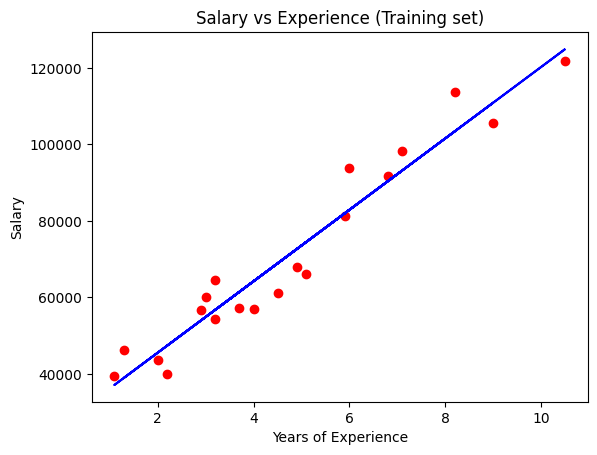

In [7]:
plt.scatter(X_train, y_train, color = 'red') # 訓練データの散布図
plt.plot(X_train, regressor.predict(X_train), color = 'blue') # 訓練データの回帰直線
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## テストデータの結果の可視化

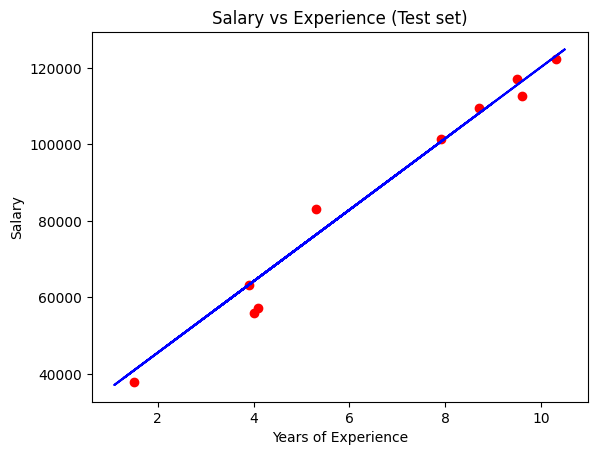

In [8]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Q. 単回帰分析のモデルを使って、具体的な数字を予測するにはどのような実装をすればよいでしょうか？ 例えば、就業年数が12年の場合における給料を予測したい場合はどうすれば良いでしょうか？

In [9]:
print(regressor.predict([[12]]))

[138967.5015615]


predictメソッドに入れたデータのは二重括弧で囲っていることに注意しましょう。なぜなら、predictメソッドが入力として受け取るデータは2D arrayである必要があるからです。:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

## 切片と係数の取得

In [10]:
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.19224403117


結果として、今回の場合における単回帰の等式は以下のようになります:

$$\textrm{給料} = 9345.94 \times \textrm{就業年数} + 26816.19$$

なお、係数と切片を取得するために用いるのはそれぞれ "coef_" と "intercept_" ですが、これらは属性であり、メソッドではありません。